## Problem Statement

Retail businesses often struggle to analyze large volumes of sales data and forecast
future demand. Inefficient analysis leads to revenue loss and poor inventory planning.

This project analyzes historical retail sales data to:
- Identify sales and profit trends
- Evaluate discount effectiveness
- Forecast future sales using time-series models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
## Data Understanding & Cleaning
df.info()
df.isnull().sum()

df["Order Date"] = pd.to_datetime(df["Order Date"])
df.sort_values("Order Date", inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 7980 to 906
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 non-

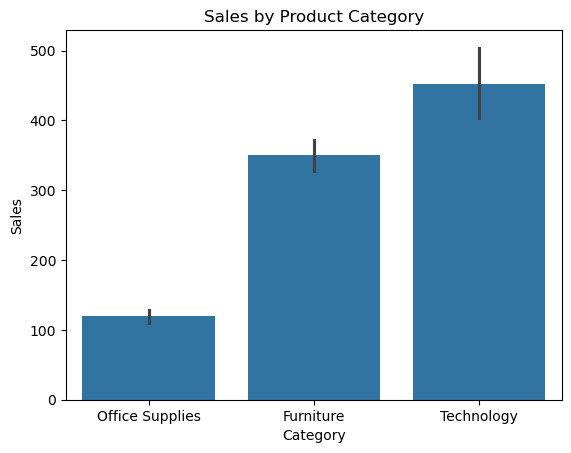

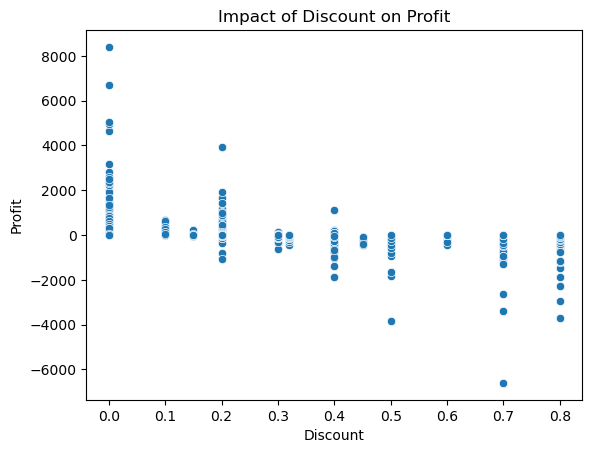

In [5]:
## Exploratory Data Analysis (EDA)
## Sales by Category
plt.figure()
sns.barplot(x="Category", y="Sales", data=df)
plt.title("Sales by Product Category")
plt.show()

## Discount vs Profit
plt.figure()
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Impact of Discount on Profit")
plt.show()

C:\Users\Anushka\AppData\Local\Temp\ipykernel_2524\2035829661.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


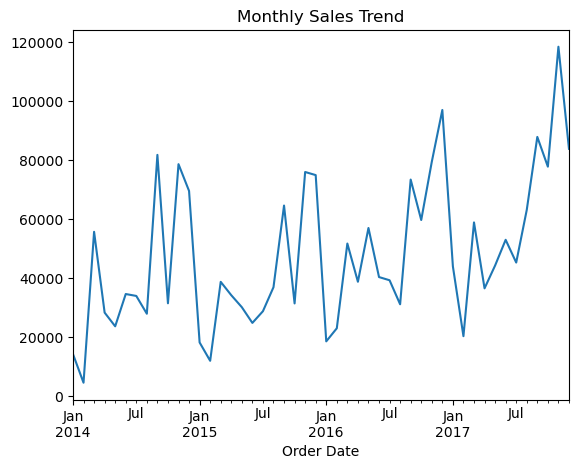

In [6]:
## Monthly Sales Trend
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


### Key Insights

- Technology category generates the highest revenue
- High discounts often lead to negative profits
- Sales show strong seasonality during year-end months

In [7]:
## Feature Engineering
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"].dt.year

In [8]:
## Time Series Forecasting (ARIMA)
model = ARIMA(monthly_sales, order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
forecast

2018-01-31    82139.634517
2018-02-28    69101.135791
2018-03-31    77479.893700
2018-04-30    67630.053600
2018-05-31    77012.295958
2018-06-30    67484.604180
Freq: ME, Name: predicted_mean, dtype: float64

## Conclusion

The analysis revealed key revenue-driving categories, unprofitable discount strategies,
and strong seasonal patterns. The ARIMA model provided reliable short-term sales forecasts,
supporting better inventory and pricing decisions.